In [ ]:
BREAST Cancer Project 44

In [2]:
### Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [3]:
sns.set_style('whitegrid')

In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_csv("BreastDatas.csv")

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df.skew()

C:\Users\SRIRAM V\AppData\Local\Temp\ipykernel_4284\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


id                         6.473752
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.shape

(569, 33)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [11]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [13]:
df.skew().sort_values(ascending=False)

C:\Users\SRIRAM V\AppData\Local\Temp\ipykernel_4284\4024944668.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew().sort_values(ascending=False)


id                         6.473752
area_se                    5.447186
concavity_se               5.110463
fractal_dimension_se       3.923969
perimeter_se               3.443615
radius_se                  3.088612
smoothness_se              2.314450
symmetry_se                2.195133
compactness_se             1.902221
area_worst                 1.859373
fractal_dimension_worst    1.662579
texture_se                 1.646444
area_mean                  1.645732
compactness_worst          1.473555
concave points_se          1.444678
symmetry_worst             1.433928
concavity_mean             1.401180
fractal_dimension_mean     1.304489
compactness_mean           1.190123
concave points_mean        1.171180
concavity_worst            1.150237
perimeter_worst            1.128164
radius_worst               1.103115
perimeter_mean             0.990650
radius_mean                0.942380
symmetry_mean              0.725609
texture_mean               0.650450
texture_worst              0

## Examine the data distribution

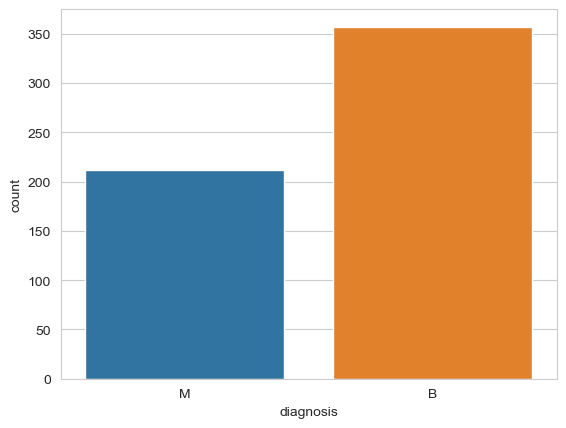

In [14]:
# Vizualization of Target variable
sns.countplot(x='diagnosis',data=df)
plt.show()

In [15]:
# Count of OutPut variable
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## We have (357 - B = benign) and (212 - M = malignant) also Data is not balanced

In [ ]:
Data1=df[["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean"]]
Data2=df[["diagnosis", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se"]]
Data3=df[["diagnosis", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]]

In [ ]:
sns.pairplot(Data1,hue='diagnosis')
plt.show()

In [ ]:
sns.pairplot(Data2,hue='diagnosis')
plt.show()

In [ ]:
sns.pairplot(Data3,hue='diagnosis')
plt.show()

In [ ]:
# Correlation inbeetween the feature variable 
corr=Data1.corr()

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
corr1=Data2.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr1,annot=True)
plt.show()

In [ ]:
corr2=Data3.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr2,annot=True)
plt.show()

In [ ]:
#Selecting the numerical features
numeric_df=df.select_dtypes(include=np.number)

In [ ]:
numeric_df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [ ]:
numeric_df.head()

In [ ]:
#Box Plot to find out the outliers in data

for col in numeric_df.columns:
    sns.boxplot(x=numeric_df[col])
    plt.show()

In [ ]:
#Data histogram plot plot
for col in numeric_df.columns:
    sns.histplot(x=numeric_df[col],color='blue')
    plt.show()

In [ ]:
#Data distribusion plot
for col in numeric_df.columns:
    sns.distplot(x=numeric_df[col],color='red')
    plt.show()

In [ ]:
df.isnull().sum()

##  Removing the insignificant columns

In [ ]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [ ]:
df.sample(10)

## Removing duplicate data

In [ ]:
#Duplicate Records
df.duplicated().sum()            ## No Duplicat data found

## Encoding the categorical variables

In [ ]:
from sklearn import preprocessing 

In [ ]:
label_encoder = preprocessing.LabelEncoder() 

In [ ]:
df['diagnosis']= label_encoder.fit_transform(df['diagnosis']) 

df['diagnosis'].unique() 

In [ ]:
df['diagnosis'].value_counts()

In [ ]:
df.head(10)

In [ ]:
df.dtypes

## Handling the outliers

In [ ]:
def removeOutlier(col):
    sorted(col)
    quant1,quant2=col.quantile([0.25,0.75])
    IQR=quant2-quant1
    lowerRange=quant1-(1.5*IQR)
    upperRange=quant2+(1.5*IQR)
    return lowerRange,upperRange


In [ ]:
for col in df.columns:
    lowScore,highScore=removeOutlier(df[col])
    df[col]=np.where(df[col]>highScore,highScore,df[col])
    df[col]=np.where(df[col]<lowScore,lowScore,df[col])

    sns.boxplot(x=df[col],data=df)
    plt.show()

##  Skewness checking and removing the skewness from the data

In [ ]:
from scipy.stats import skew

In [ ]:
for col in df.columns:
    print("With Skewness "+col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(x=df[col],color='red')
    plt.show()
    
    df[col]=np.sqrt(df[col])
    
    print("Without Skewness "+col)
    print(skew(df[col]))

    plt.figure()
    sns.distplot(x=df[col],color='red')
    plt.show()

## Model Implementation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Importing Machine Learning Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Importing to Check the Model Accuracy, Errors and it's Validations


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn import metrics

In [ ]:
df.head(10)

## Train Test Splitting

In [ ]:
X = df.drop(['diagnosis'],axis=1)
y = df[['diagnosis']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

### we will use the same data set as it is and observe the resuls of models

# Defining the function for Training the model

In [ ]:
def model_building(model, X_train, X_test, y_train, y_test):
    
    """ Model Fitting, Prediction And Other stuff
        return ('score', 'accuracy_score', 'predictions' )
    """
    
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)
     
    return (score, accuracy, predictions)

## model selection list

In [ ]:
models_list = {
    "Logistic Regression" :  LogisticRegression(),
    "Random Forest Classifier" :  RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5),
    "Decision Tree Classifier" :  DecisionTreeClassifier(criterion='entropy', random_state=0),
    "Naive Bayes Classifier":GaussianNB(),
    "K Neighbors Classifier":KNeighborsClassifier(),
    "SVC" :  SVC(),
}

In [ ]:
print(list(models_list.keys()))
print(list(models_list.values()))

In [ ]:
# The function for confision metric Graphs

def cm_metrix_graph(cm):
    
    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()
        

## Calling the function "model_building" to Train the models and Checking the Model Accuracy, Errors, it's Validations and Confusion Metrix

In [ ]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    
    (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    
    print(( "\n\nClassification Report of '") + str(name), "'\n")
    
    print(classification_report(y_test, predictions))

    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    
    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))
    

    # For confusion Metrics heatmap
    cm = confusion_matrix(y_test,predictions)
 
     #Plot the confusion matrix.
    sns.heatmap(cm, annot=True,
            fmt='g', 
            xticklabels=['Dog','Not Dog'],
            yticklabels=['Dog','Not Dog'])
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Confusion Matrix',fontsize=17)
    plt.show()
    
  
    
    
    

In [ ]:
print(len(confusion_matrixs))

## Normalization Using sklearn

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [ ]:
print(X_train_norm)

In [ ]:
print(X_test_norm)

In [ ]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    
    (score, accuracy, predictions) = model_building(model, X_train_norm, X_test_norm, y_train, y_test )
    
    print(( "\n\nClassification Report of '") + str(name), "'\n")
    
    print(classification_report(y_test, predictions))

    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    
    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))
    

    # For confusion Metrics heatmap
    cm = confusion_matrix(y_test,predictions)
 
     #Plot the confusion matrix.
    sns.heatmap(cm, annot=True,
            fmt='g', 
            xticklabels=['Dog','Not Dog'],
            yticklabels=['Dog','Not Dog'])
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Confusion Matrix',fontsize=17)
    plt.show()
    
 

## After the Normalization score

In [ ]:
df_prediction = []
print(len(confusion_matrixs))
df_pred

## Standardization Using sklearn

In [ ]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = list(X_train)


In [ ]:
print(num_cols)

In [ ]:
# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [ ]:
print(X_test_stand.head())

In [ ]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    
    (score, accuracy, predictions) = model_building(model, X_train_stand, X_test_stand, y_train, y_test )
    
    print(( "\n\nClassification Report of '") + str(name), "'\n")
    
    print(classification_report(y_test, predictions))

    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    
    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))
    

    # For confusion Metrics heatmap
    cm = confusion_matrix(y_test,predictions)
 
     #Plot the confusion matrix.
    sns.heatmap(cm, annot=True,
            fmt='g', 
            xticklabels=['Dog','Not Dog'],
            yticklabels=['Dog','Not Dog'])
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Confusion Matrix',fontsize=17)
    plt.show()
    

## We have Litilbit imbalanced data,
so we will use Resampling Techniques to Solve Class Imbalance

In [ ]:
sns.countplot(x='diagnosis',data=df)
plt.show()
df.diagnosis.value_counts()

### We will start by separating the class that will be 0 and class 1.

In [ ]:
# class count
class_count_0, class_count_1 = df['diagnosis'].value_counts()

# Separate class
class_0 = df[df['diagnosis'] == 0]
class_1 = df[df['diagnosis'] == 1]

# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

#  Random Under-Sampling

In [ ]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total diagnosis of 1 and 0:\n",test_under['diagnosis'].value_counts())# plot the count after under-sampeling
test_under['diagnosis'].value_counts().plot(kind='bar', title='count (target)')
plt.show()

In [ ]:
import imblearn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)
# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', y.value_counts())
print('Resample dataset shape', y_rus.value_counts())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.25, random_state=15)

In [ ]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    
    (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    
    print(( "\n\nClassification Report of '") + str(name), "'\n")
    
    print(classification_report(y_test, predictions))

    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    
    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))
    

    # For confusion Metrics heatmap
    cm = confusion_matrix(y_test,predictions)
 
     #Plot the confusion matrix.
    sns.heatmap(cm, annot=True,
            fmt='g', 
            xticklabels=['Dog','Not Dog'],
            yticklabels=['Dog','Not Dog'])
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Confusion Matrix',fontsize=17)
    plt.show()
    